In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [42]:
white_wine = pd.read_csv('white_wine.csv')
red_wine = pd.read_csv('red_wine.csv')

In [43]:
white_wine['type']= 'white'
red_wine['type']= 'red'

In [44]:
red_wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [45]:
white_wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


In [46]:
combined_wines= pd.concat([red_wine, white_wine])

In [47]:
combined_wines

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [48]:
combined_wines.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [32]:
combined_wines.columns= combined_wines.columns.str.replace(' ', '')

In [49]:
def the_split(combined_wines):
    
    # train/validate/test split and is reproducible due to random_state = 123
    train_validate, test= train_test_split(combined_wines, test_size= .2, random_state= 123)
    train, val= train_test_split(train_validate, test_size= .3, random_state =123)
    
    
    print(f'Train shape:{train.shape}\n' )   
    print(f'Validate shape:{val.shape}\n' )    
    print(f'Test shape:{test.shape}\n' )
    return train, val, test 

In [50]:
train, val, test= the_split(combined_wines)

Train shape:(3637, 13)

Validate shape:(1560, 13)

Test shape:(1300, 13)



# Exploration 

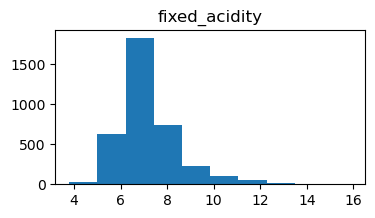

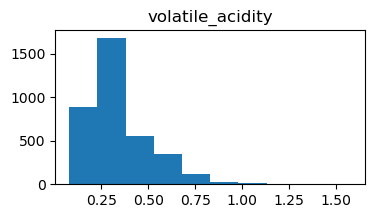

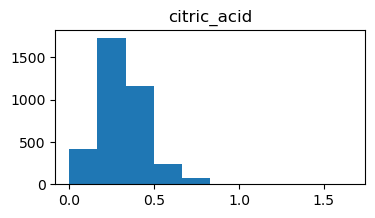

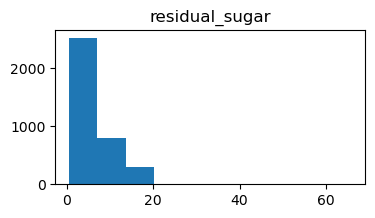

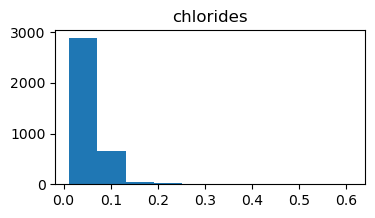

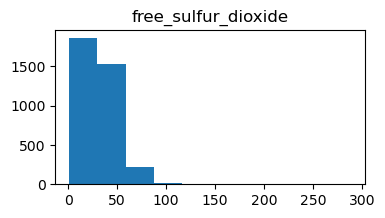

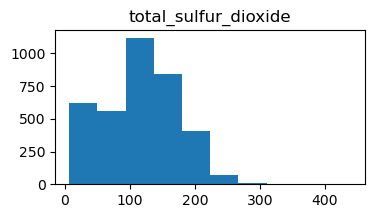

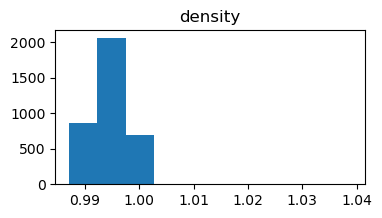

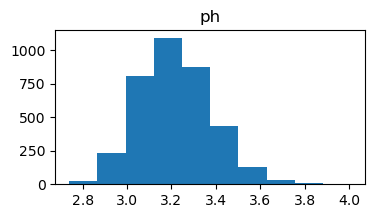

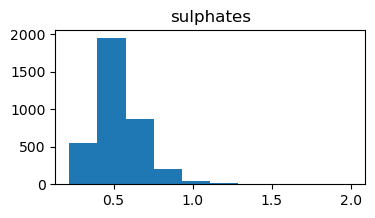

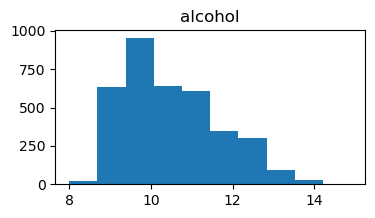

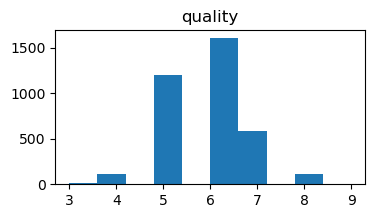

In [36]:
for col in combined_wines.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

# Does PH significantly affect each wine differently
$H_o$: PH does not significanlty affect each wine differntly 

$H_a$: PH does significanlty affect each wine differntly 

In [51]:
train.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
2138,5.5,0.24,0.32,8.7,0.06,19.0,102.0,0.994,3.27,0.31,10.4,5,white


In [54]:
red= train[train.type == 'red']
white= train[train.type == 'white']

In [73]:
red_ph= red.ph

In [89]:
white_ph= white.ph

2138    3.27
601     2.88
2540    3.13
1344    3.26
2220    2.98
        ... 
2901    3.27
3319    3.50
1943    3.18
285     3.08
607     3.43
Name: ph, Length: 2738, dtype: float64

In [77]:
print(red_ph.var())
print(white_ph.var())

0.0231633314422608
0.023459163925995615


In [84]:
alpha= .05

In [87]:
t, p = stats.ttest_ind(red_ph, white_ph, equal_var= True )
t, p
print("Reject the Null hypothesis? ", p < alpha)


Reject the Null hypothesis?  True


In [114]:
total_ph= train.ph

In [123]:
train.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
2138,5.5,0.24,0.32,8.7,0.06,19.0,102.0,0.994,3.27,0.31,10.4,5,white


# Is there a relationship between sugar and Quality

In [257]:
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,cluster,cluster2,type_white,scaled_cluster,scaled_cluster2
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,2,0,1,2,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,0,1,0,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,0,0,1,2,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,1,0,1,2,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,5,0,0,1,2,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5,1,1,1,0,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,5,2,1,1,0,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,5,2,1,1,0,0


<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

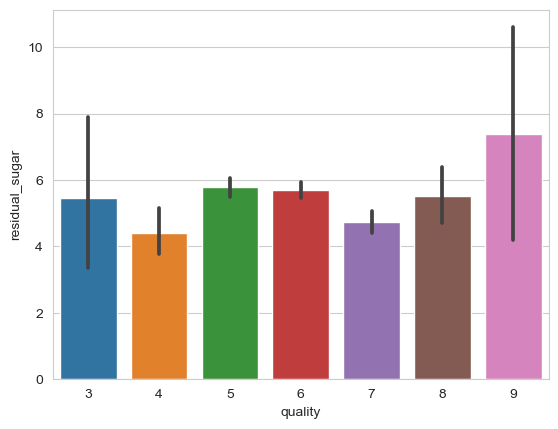

In [265]:
sns.set_style('whitegrid')
sns.barplot(data= train, x='quality', y= 'residual_sugar' )

# Clustering

# scale and fit the features that we'll be using

In [177]:
combined_wines.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [196]:
wine_scaled= train.copy()

In [197]:
#Create an instance of the scaler and fit/transform the same features I used before
mms = MinMaxScaler()

wine_scaled[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
             'free_sulfur_dioxide', 'total_sulfur_dioxide',
             'density', 'ph', 'sulphates', 'alcohol']]= mms.fit_transform(wine_scaled[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
             'free_sulfur_dioxide', 'total_sulfur_dioxide',
             'density', 'ph', 'sulphates', 'alcohol']])

wine_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,cluster,cluster2,type_white
2138,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,5,2,0,1
19,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,6,0,1,0
601,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,6,0,0,1
2540,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,5,1,0,1
501,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,7,2,2,0


In [184]:
feat= train[['residual_sugar', 'alcohol']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(feat)

kmeans.predict(feat)


array([2, 0, 0, ..., 2, 2, 0], dtype=int32)

In [185]:
train['cluster'] = kmeans.predict(feat)

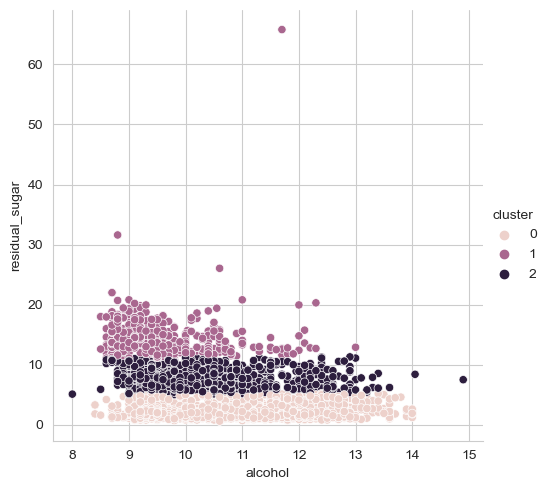

In [218]:
sns.relplot(data= train, y= 'residual_sugar', x= 'alcohol', hue= 'cluster')

In [198]:
feat_scaled= wine_scaled[['residual_sugar', 'alcohol']]
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(feat_scaled)

kmeans_scaled.predict(feat_scaled)


array([2, 0, 2, ..., 0, 0, 2], dtype=int32)

In [201]:
feat_scaled['scaled_cluster']= kmeans_scaled.predict(feat_scaled)

/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_17202/604564748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_scaled['scaled_cluster']= kmeans_scaled.predict(feat_scaled)


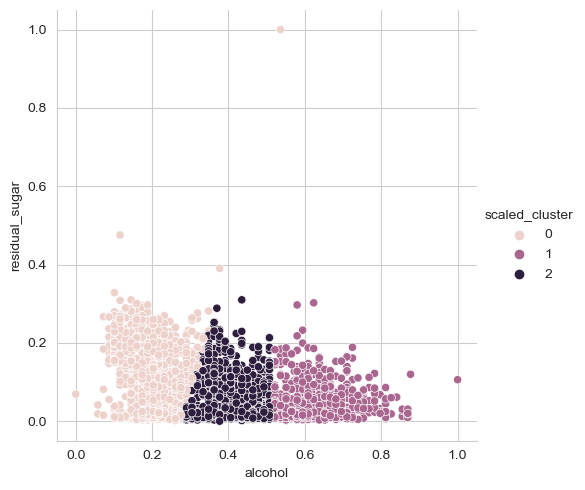

In [219]:
sns.relplot(data= feat_scaled, y= 'residual_sugar', x= 'alcohol', hue= 'scaled_cluster')

In [210]:
feat2= train[['chlorides', 'alcohol']]
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(feat2)

kmeans2.predict(feat2)


array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [211]:
train['cluster2'] = kmeans2.predict(feat2)

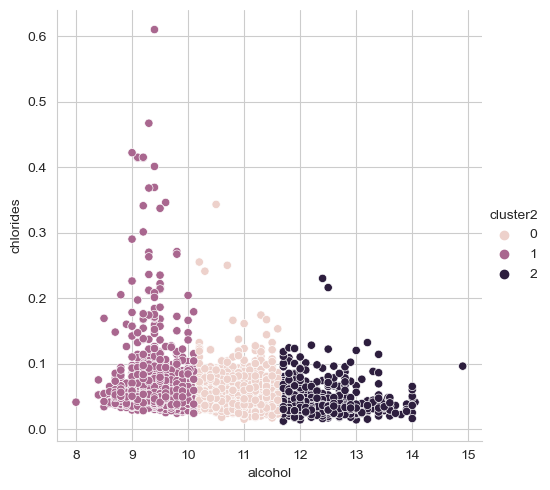

In [217]:
sns.relplot(data= train, y= 'chlorides', x= 'alcohol', hue= 'cluster2')

In [213]:
feat2_scaled= wine_scaled[['chlorides', 'alcohol']]
kmeans2_scaled= KMeans(n_clusters=3)
kmeans2_scaled.fit(feat2_scaled)

kmeans2_scaled.predict(feat2_scaled)


array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

In [214]:
feat2_scaled['cluster2_scaled']= kmeans2_scaled.predict(feat2_scaled)

/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_17202/4057994595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat2_scaled['cluster2_scaled']= kmeans2_scaled.predict(feat2_scaled)


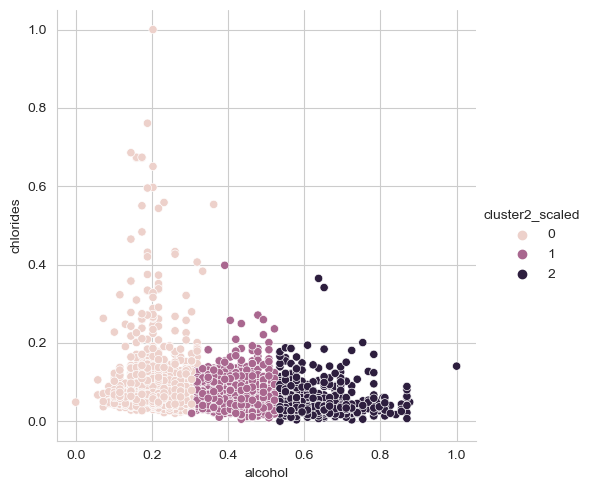

In [216]:
sns.relplot(data= feat2_scaled, y= 'chlorides', x= 'alcohol', hue= 'cluster2_scaled')

In [166]:
dummy_df = pd.get_dummies(train[['type']],
                              drop_first=True)
train = pd.concat([train, dummy_df], axis=1 )

In [172]:
train.drop(columns= ['type'], inplace= True)

# Stats test related to our scaled cluster

$H_0$: The Quality of wine is independent of scaled_cluster2

$H_a$: The Quality of wine is dependent of scaled_cluster2

In [220]:
train['scaled_cluster2']= feat2_scaled.cluster2_scaled

In [226]:
contingency_table = pd.crosstab(train.scaled_cluster2, train.quality)
contingency_table

quality,3,4,5,6,7,8,9
scaled_cluster2,,,,,,,
0,9,62,862,665,87,15,0
1,9,41,300,650,239,29,1
2,1,8,37,295,262,64,1


In [229]:
test_results = stats.chi2_contingency(contingency_table)
chi2, p, dof, expected = test_results

chi2, p

(865.4845807910216, 1.4771070880128996e-177)

# Modeling

In [248]:
X= train[['scaled_cluster']]

In [252]:
combined_wines = pd.concat([combined_wines, X])
combined_wines

NameError: name 'right' is not defined

In [234]:
def six_split(train, val, test):
    """
    this functions splits the data into 6 different datasets. We will use them for 
    our modeling 
    """
    # split into X and y train dataset 
    X_train= train.drop(columns=['quality'])
    y_train= train['quality']

    # split into X and y val dataset 
    X_val= val.drop(columns=['quality'])
    y_val= val['quality']

    # split into X and y test dataset 
    X_test= test.drop(columns=['quality'])
    y_test= test['quality']

    y_train= pd.DataFrame(y_train)
    y_val= pd.DataFrame(y_val)
    y_test= pd.DataFrame(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test


In [235]:
X_train, y_train, X_val, y_val, X_test, y_test= six_split(train, val, test)

In [240]:
def calc_baseline(y_train,y_val):
       
    y_train= pd.DataFrame(y_train)
    y_val= pd.DataFrame(y_val)

    # 1. Predict value_pred_mean
    quality_mean= y_train['quality'].mean()
    y_train['quality_mean']= quality_mean
    y_val['quality_mean']= quality_mean

    # 2. compute value_pred_median
    quality_median = y_train['quality'].median()
    y_train['quality_median']= quality_median
    y_val['quality_median']= quality_median

    # 3. RMSE of value_pred_mean
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_mean)**(1/2)
    rmse_val = mean_squared_error(y_val.quality, y_val.quality_mean)**(1/2)

    print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
        "\nValidate/Out-of-Sample: ", round(rmse_val, 2))

    # 4. RMSE of value_pred_median
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_median)**(1/2)
    rmse_val = mean_squared_error(y_val.quality, y_val.quality_median)**(1/2)

    print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
        "\nValidate/Out-of-Sample: ", round(rmse_val, 2))
        

In [241]:
calc_baseline(y_train, y_val)

RMSE using Mean
Train/In-Sample:  0.87 
Validate/Out-of-Sample:  0.89
RMSE using Median
Train/In-Sample:  0.89 
Validate/Out-of-Sample:  0.91
